# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import os

# Import openweathermap API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy as cp

# Output File (CSV)
output_data_file = os.path.join("..","output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_names = []
city_countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = cp.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_names.append(city.city_name)
        city_countries.append(city.country_code)

# Print the city count to confirm sufficient count

# city_names = [None]*len(cities)
# city_countries = [None]*len(cities)
# for i,v in enumerate(cities):
#     city_names[i] = v.city_name
#     city_countries[i] = v.country_code


In [27]:
len(city_names)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# here the base url is for current weather data. Using historical data would be better for this exercise, 
# but it aint free
current_weather_base_url = "http://api.openweathermap.org/data/2.5/weather?"
forecast_weather_base_url = "http://api.openweathermap.org/data/2.5/forecast?"
# weather_params = \
# {
#     "q": city.city_name + "," + city.country_code,
#     "units": "imperial",
#     "appid": api_key
# }


In [29]:
cities_df = pd.DataFrame({"Name": city_names, "Country Code": city_countries})
cities_df["Latitude"] = None
cities_df["Longitude"] = None
cities_df["Temp"] = None
cities_df["Humidity"] = None
cities_df["Cloudiness"] = None
cities_df["Wind Speed"] = None
cities_df.head()


,Name,Country Code,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,mkushi,zm,None,None,None,None,None,None
1,atuona,pf,None,None,None,None,None,None
2,saint george,bm,None,None,None,None,None,None
3,vanimo,pg,None,None,None,None,None,None
4,east london,za,None,None,None,None,None,None


In [103]:
# datetime.utcfromtimestamp(response["dt"])
# time.strftime("%x %X", time.localtime(response["dt"]))
# time.mktime(time.localtime())
# 86400*7

In [104]:
# response = requests.get(current_weather_base_url, params=weather_params).json()

# print(json.dumps(response, indent=4))
# pprint(response)

In [105]:
# len(response["list"])
# 1573344000 - 1573354800

In [30]:
# iterating over the rows of the cities dataframe
for index, row in cities_df.iterrows():
    # creating the parameters for each API query for each city
    weather_params = \
    {
        "q": row["Name"] + "," + row["Country Code"],
        "units": "imperial",
        "appid": api_key
    }
    # print(row["Name"] + "," + row["Country Code"])
    # query
    response = requests.get(current_weather_base_url, params=weather_params)
    response_json = response.json()
    
    # only filling out the dataframe if the response is successful
    if response.status_code == 200:
        row["Latitude"] = response_json["coord"]["lat"]
        row["Longitude"] = response_json["coord"]["lon"]
        row["Temp"] = response_json["main"]["temp"]
        row["Humidity"] = response_json["main"]["humidity"]
        row["Wind Speed"] = response_json["wind"]["speed"]
        row["Cloudiness"] = response_json["clouds"]["all"]
        


In [31]:
# if the response was unsuccessful, no data was found for that city, and it needs to be dropped from the
# dataframe before plotting
cities_df.dropna(inplace=True)
cities_df.to_csv(output_data_file)
cities_df.shape


(552, 8)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [108]:
# np.absolute(cities_df["Lat"])

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature vs. Absolute Latitude')

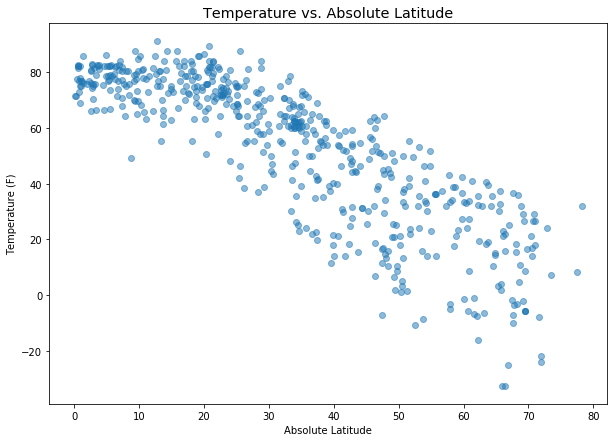

In [32]:
plt.figure(figsize=(10,7))
plt.scatter(np.absolute(cities_df["Latitude"]), cities_df["Temp"], alpha=0.5)
plt.xlabel("Absolute Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Absolute Latitude", size = "x-large")

# plt.savefig("..","Images","Temperature vs Absolute Latitude.png")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity vs. Absolute Latitude')

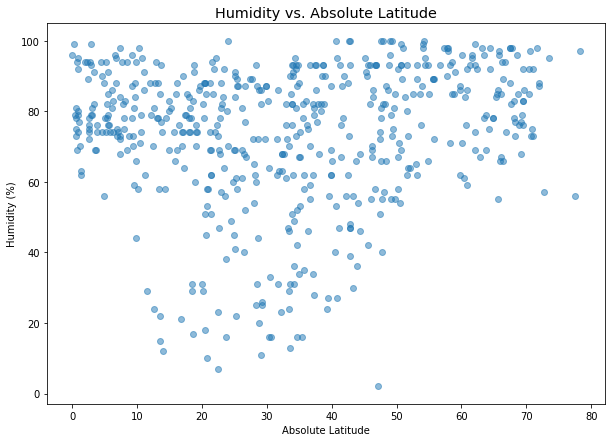

In [33]:
plt.figure(figsize=(10,7))
plt.scatter(np.absolute(cities_df["Latitude"]), cities_df["Humidity"], alpha=0.5)
plt.xlabel("Absolute Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Absolute Latitude", size = "x-large")

# plt.savefig("..","Images","Humidity vs Absolute Latitude.png")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness vs. Absolute Latitude')

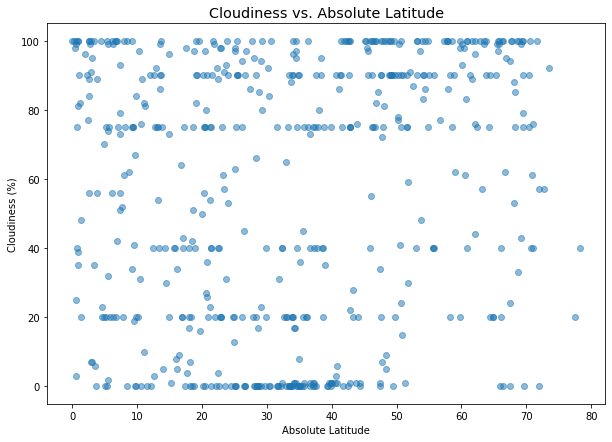

In [34]:
plt.figure(figsize=(10,7))
plt.scatter(np.absolute(cities_df["Latitude"]), cities_df["Cloudiness"], alpha=0.5)
plt.xlabel("Absolute Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Absolute Latitude", size = "x-large")

# plt.savefig("..","Images","Cloudiness vs Absolute Latitude.png")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed vs. Absolute Latitude')

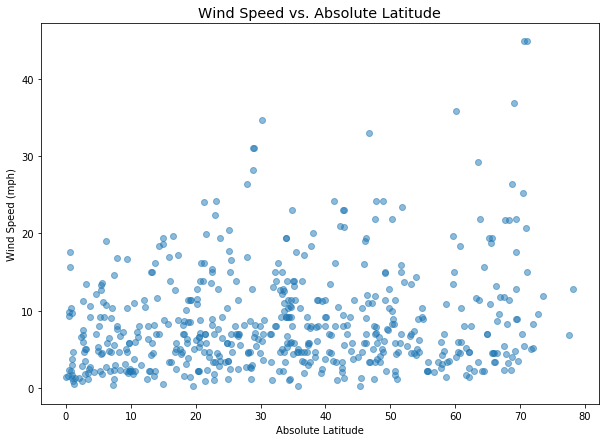

In [35]:
plt.figure(figsize=(10,7))
plt.scatter(np.absolute(cities_df["Latitude"]), cities_df["Wind Speed"], alpha=0.5)
plt.xlabel("Absolute Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs. Absolute Latitude", size = "x-large")

# plt.savefig("..","Images","Wind Speed vs Absolute Latitude.png")